# All Pass Filter

An allpass filter can be defined as any filter having a gain of $1$ at all frequencies (but typically different delays at different frequencies), which create a different phase response. It is well known that the series combination of a feedforward and feedback comb filter (having equal delays) creates an allpass filter when the feedforward coefficient is the negative of the feedback coefficient. 

Algorithm could be drew as


<img align="center" width=50% src="all_pass_filter.png" alt>


Derive follow the equation below, consider the input of delay line is $v(n)$

$$\begin{align}
v(n) = x(n)-g v(n-M)\\
y(n) = g v(n)+v(n-M)\\ \tag{1}
\end{align}$$

The system of can be interpreted as the series combination of a feedback comb filter taking $x(n)$ to $v(n)$ followed by a feedforward comb filter taking $v(n)$ to $y(n)$. By the commutativity of LTI systems, we can interchange the order to get


$$\begin{align}
v(n) = g x(n) + x(n-M)\\ 
y(n) = v(n) - g y(n-M)\\ \tag{2}
\end{align}$$

Substituting the right-hand side of the first equation above for $ v(n)$ in the second equation yields more simply 

$$\begin{align}
y(n) &= g x(n) + x(n-M) - g y(n-M)\\
y(n) + g y(n-M) &= g x(n) + x(n-M)\\ \tag{3}
\end{align}$$

and transfer equation into $z$ domain

$$\begin{align}
Y(z) + g Y(z)z^{-M} &= g X(z) + X(z)z^{-M} \\
Y(z)(1 + g z^{-M}) &= X(z)(g + z^{-M})\\ \tag{4}
\end{align}$$

Finally transfer function $H(z)$ can be written as

$$
H(z) = \frac{Y(z)}{X(z)} = \frac{g + z^{-M}}{1 + g z^{-M}}\tag{5}
$$

$g$ controll both feedback and feedforward gain in comb filter, could be obtained $f_{c}$, the cutoff frequency of the allpass filter and $f_{s}$ is sample rate of the filter

$$
g = \frac {tan(\pi f_{c}/f_{s}-1)}{tan(\pi f_{c}/f_{s}+1)}\tag{6}
$$

The frequency response is obtained by setting $ z = e^{j\omega T}$ , where $ \omega $ denotes radian frequency and $ T$ denotes the sampling period in seconds which is the reciprocal of $f_{s}$. For allpass filter, the freqeuncy response should be flat, magnitude is equal for all $\omega$.

$$
\left\vert H(e^{j\omega T})\right\vert 
= 
\left\vert\frac{\overline{a} + e^{-j\omega MT}}{1 + a e^{-j\omega MT}}\right\vert 
=
\left\vert\frac{\overline{a} + e^{-j\omega MT}}{e^{j\omega MT} + a}\right\vert
= 
\left\vert\frac{\overline{a + e^{j\omega MT}}}{a+e^{j\omega MT}}\right\vert \tag{7}
= 1.
$$

An additional explanation in complex conjugate with absolute calculation to help the derive $(7)$ equation above

$$\begin{align}
\left\vert1 + a e^{-j\omega MT}\right\vert 
=
\left\vert 1 + a(cos \theta - i sin \theta)\right\vert &= \left\vert 1 + a cos \theta - a i sin \theta \right\vert \\
&=
\sqrt{(1+ a cos\theta)^{2} + (-a sin \theta)^{2}} \\
&=
\sqrt{1^{2} + 2 a cos \theta + a^2 cos^2 \theta + a^2 sin \theta} \\
&=
\sqrt{a^2 +1 + 2 a cos \theta} \\
&=
\sqrt{a^2 + 2 a cos \theta + cos^2 \theta + sin^2 \theta} \\
&=
\sqrt{(a + cos \theta)^2 + (sin \theta)^2} \\
&=
\left\vert a + cos \theta + i sin \theta \right\vert = \left\vert{e^{j\omega MT} + a}\right\vert \\ \tag{8}
\end{align}$$

In [1]:
from math import pi
import numpy as np
import scipy.signal
import matplotlib.pyplot as plt

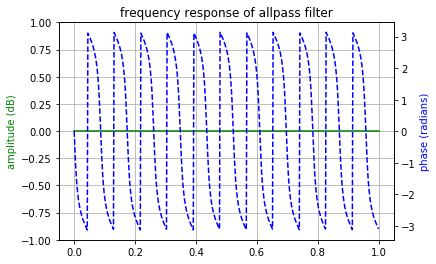

In [23]:
sr = 44100
fc = 4000

alpha = (np.tan(pi * fc / sr) - 1) / (np.tan(pi * fc / sr) + 1)

delaysample = 23
arraysize = delaysample+1

numerator = np.zeros(arraysize)
denominator = np.zeros(arraysize)

numerator[0] = alpha
numerator[delaysample] = 1

denominator[0] = 1
denominator[delaysample] = alpha

w, h = scipy.signal.freqz(numerator, denominator)

amplitude = 20 * np.log10(abs(h))
angle = np.angle(h)

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

plt.title('frequency response of allpass filter')
plt.xlabel(r'normalized frequency (x$\pi$rad/sample)')

ax1.plot(w/max(w), amplitude, 'g')
ax1.set_ylabel('amplitude (dB)', color='g')
ax1.set_ylim(-1, 1)
ax1.grid()

ax2.plot(w/max(w), angle, 'b--')
ax2.set_ylabel('phase (radians)', color='b')

plt.show()

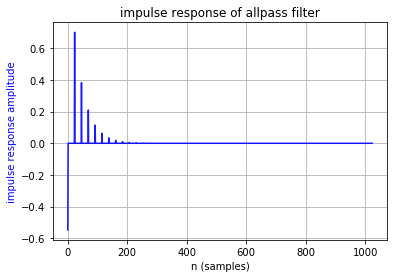

In [24]:
x_axis = np.arange(1024)
impulse = np.zeros(1024)
impulse[0] = 1.0

impulse_response = scipy.signal.lfilter(numerator, denominator, impulse)
plt.plot(x_axis, impulse_response, color='b', alpha=0.9)
plt.title('impulse response of allpass filter')
plt.ylabel('impulse response amplitude', color='b')
plt.xlabel('n (samples)')
plt.grid()

plt.show()